In [1]:
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, make_scorer, mean_squared_error





In [6]:
includeMakeModel = True

nEstimators = 500

def GetDataMatrix():
    Xmodelmake = pd.read_csv('data.csv', header=0, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,13,14,));
    if not includeMakeModel:
        X = pd.read_csv('data.csv', header=0, usecols= (2,3,4,5,6,7,8,9,10,11,13,14,));
    else:
        X = Xmodelmake
        
    Y = pd.read_csv('data.csv', header=0, usecols=(15,));
    X, Y, Xmodelmake = shuffle(X,Y, Xmodelmake)
    Xmake = Xmodelmake['Make']
    Xmodel = Xmodelmake['Model']
    
    if not includeMakeModel:
        X = pd.get_dummies(X, dummy_na = False, columns=['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']);
    else:
         X = pd.get_dummies(X, dummy_na = False, columns=['Make','Model','Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']);
    
    X.insert(0, 'ModelRef', Xmodel);
    X.insert(0, 'MakeRef', Xmake);
    
    X.fillna(0, inplace=True);
    return(X, Y, Xmodelmake)


In [11]:
(X, Y, Xmodelmake) = GetDataMatrix()
X

,MakeRef,ModelRef,Year,Engine HP,Engine Cylinders,Number of Doors,city mpg,Popularity,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
2694,Mercedes-Benz,CLA-Class,2017,208.0,4.0,4.0,23,617,0,0,...,0,0,0,0,0,0,0,0,1,0
4469,Ford,F-150 SVT Lightning,2000,360.0,8.0,2.0,12,5657,0,0,...,0,0,0,0,0,0,0,1,0,0
2529,Honda,Civic CRX,1990,108.0,4.0,2.0,24,2202,0,0,...,0,0,0,0,0,0,0,0,0,0
7258,Dodge,Nitro,2011,210.0,6.0,4.0,15,1851,0,0,...,0,0,0,0,0,0,0,0,0,0
5952,Oldsmobile,Intrigue,2000,215.0,6.0,4.0,17,26,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Cadillac,CTS,2017,268.0,4.0,4.0,21,1624,0,0,...,0,0,0,0,0,0,0,0,1,0
10273,Ford,Taurus X,2008,260.0,6.0,4.0,15,5657,0,0,...,0,0,0,0,0,0,0,0,0,1
944,Porsche,911,2016,400.0,6.0,2.0,19,1715,0,0,...,0,0,1,0,0,0,0,0,0,0
8260,Land Rover,Range Rover Evoque,2016,240.0,4.0,4.0,21,258,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y_unraveled = np.ravel(Y);
Y_unraveled

array([16299, 33595, 35035, ..., 19565, 62015, 17070], dtype=int64)

In [13]:
print('Splittting into training and test.....')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_unraveled, test_size=0.10, random_state = 32 )

Splittting into training and test.....


In [14]:
MSE_Scorer = make_scorer(mean_squared_error);

In [17]:
X_train2 = X_train.drop('MakeRef', axis =1).drop('ModelRef', axis = 1)
X_test2 =  X_test.drop('MakeRef', axis =1).drop('ModelRef', axis = 1)

In [18]:
print("training classifier....")
clf = RandomForestRegressor(n_estimators = nEstimators, max_features="sqrt");
clf = clf.fit(X_train2, Y_train);
print("Done training best classifier..")

training classifier....
Done training best classifier..


In [20]:
print('Calculating error...')
y_pred = clf.predict(X_test2);
scores = cross_val_score(clf, X_test2, Y_test, cv =5)
print()

Calculating error...



In [21]:
print("Scores:")
print(scores);

Scores:
[ 0.0053833  -0.31738776 -0.66733163 -0.23716086 -0.04241773]


In [22]:
print("Mean absolute error:");
mean_error = sum(abs(Y_test-y_pred))/len(Y_test);
print(mean_error);


Mean absolute error:
33118.89538609363


In [24]:
print("Mean percent error: ")
print(mean_error/np.mean(Y_test))
print()

Mean percent error: 
0.806581943168849



In [25]:
print("ypred:");
print(Y_test);
print(y_pred);

ypred:
[22795 14435 36500 ... 60450  2000 25170]
[44324.211      43572.23660952 41394.62108333 ... 44197.0039381
 32842.72317713 38331.97964286]


In [27]:
np.savetxt("ypred_test.csv",(y_pred,Y_test),delimiter=",");
print()

In [29]:
# If we used JSON file, this would've been easier
# This code is trying to get the data off Kaggle and making the make and popularities unique
# since the data can list them multiple times

# Make elements in cars unique and return in same order
cars = np.asarray(Xmodelmake['Make'])
uniquecarindices = np.unique(cars, return_index=True)[1]
cars = np.asarray([cars[index] for index in sorted(uniquecarindices)])

# Make elements in popularities unique and return in same order
popularities = np.asarray(Xmodelmake['Popularity'])
uniquepopularityindices = np.unique(popularities, return_index=True)[1]
popularities = np.asarray([popularities[index] for index in sorted(uniquepopularityindices)])

# Get the indices sorted on popularities from highest to lowest
popindices = np.argsort(popularities)[::-1]

In [30]:
# Data range
totalN = popindices.shape[0]

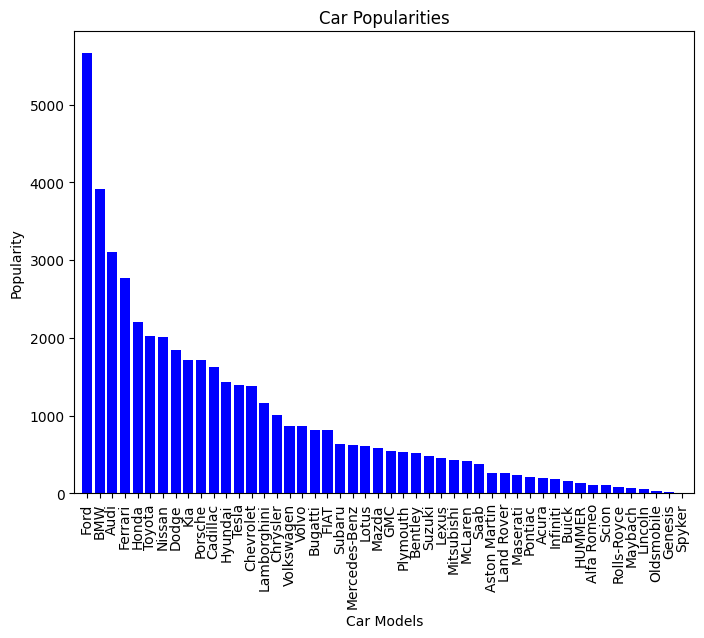

In [31]:
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Car Popularities")
plt.bar(range(totalN), popularities[popindices], color="b", align="center")
plt.xticks(rotation=90)
plt.xticks(range(totalN), cars[popindices])
plt.xlim([-1, totalN])
plt.xlabel('Car Models')
plt.ylabel('Popularity')
plt.show()

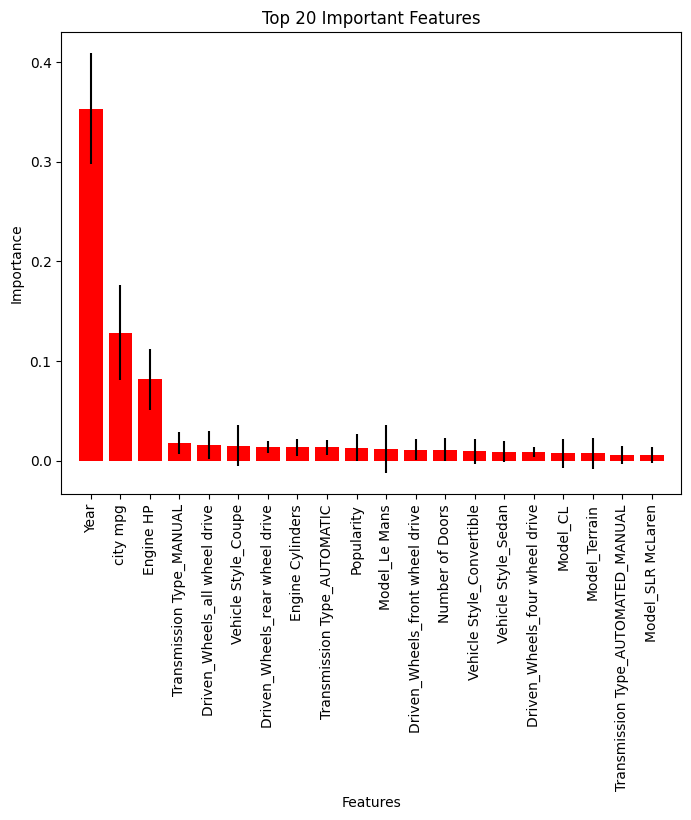

In [32]:
# Important questions to answer

# 1. What features most predict price?

# Get the importances and calculate standard deviations for each
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_test2.columns.values

# Want the top 20 features, so limit the indices and labels
topLimit = 20 # limit to show up to, ex. top 10
indices = indices[0: topLimit] # indices for features
topLabels = features[indices[0: topLimit]] # actual feature labels, we want to print these

# Plot the feature importances of the forest (top 20)
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 20 Important Features")
ax = plt.bar(range(topLimit), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(rotation=90)
plt.xticks(range(topLimit), topLabels)
plt.xlim([-1, topLimit])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

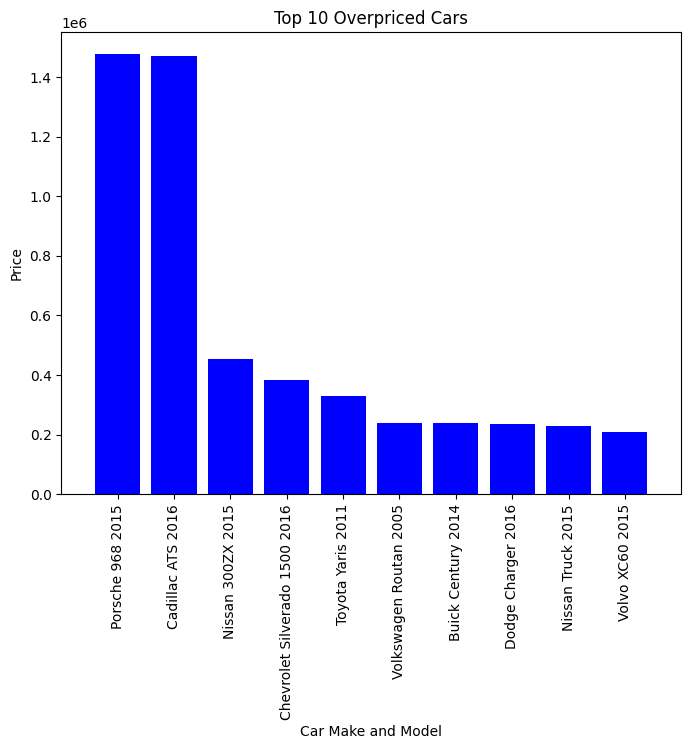

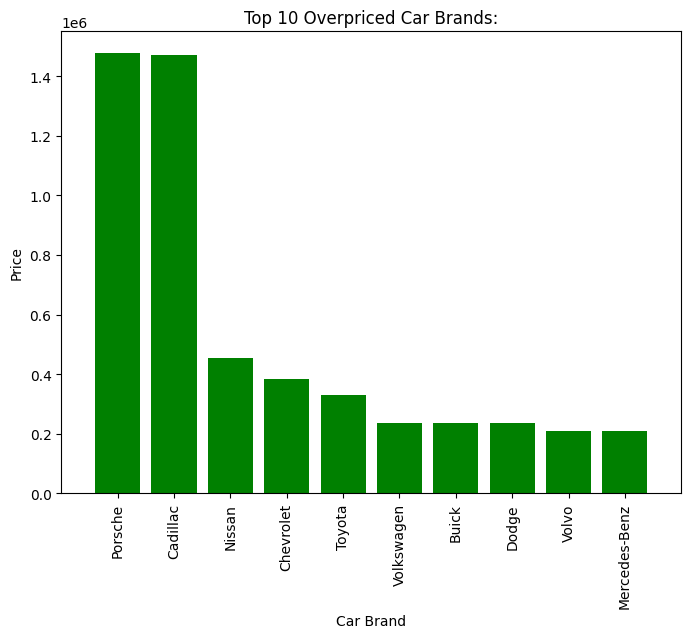

In [34]:
# 2. What cars are the most over-priced for their feature set?

# Get the errors from the prediction and sort from greatest to least
y_error = Y_test-y_pred
old_indices = np.argsort(y_error)[::-1] # returns the old indices

# Put top 10 overpriced cars into a list
modelmakelist = []
N = 10 # number of top values to extract
for i in range(N):
    modelmakelist.append(X_test['MakeRef'].iloc[old_indices[i]]
                         + ' ' + X_test['ModelRef'].iloc[old_indices[i]]
                         + ' ' + str(X['Year'].iloc[old_indices[i]]))
modelmakelist = np.asarray(modelmakelist) # don't index into original

# Plot the top 10 overpriced cars against their price
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 10 Overpriced Cars")
plt.bar(range(N), y_error[old_indices[0:N]], color="b", align="center")
plt.xticks(rotation=90)
plt.xticks(range(N), modelmakelist)
plt.xlim([-1, N])
plt.xlabel('Car Make and Model')
plt.ylabel('Price')
plt.show()

# Put top 10 overpriced brands into a list
# Scan all entries, if maker already exists, go to next entry, else add maker to list
existingmakers = []
pricelist = []
for i in range(old_indices.shape[0]):
    currentmaker = X_test['MakeRef'].iloc[old_indices[i]]
    if currentmaker not in existingmakers:
        existingmakers.append(currentmaker)
        pricelist.append(y_error[old_indices[i]])
        if len(existingmakers) == N:
            break

existingmakers = np.asarray(existingmakers)
pricelist = np.asarray(pricelist)
    
figsize = (8,6)
plt.figure(figsize=figsize)
plt.title("Top 10 Overpriced Car Brands:")
plt.bar(range(N), pricelist, color="g", align="center")
plt.xticks(rotation=90)
plt.xticks(range(N), existingmakers)
plt.xlim([-1, N])
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.show()